# Answers to Some Research Questions

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_colwidth = 300
pd.options.display.max_columns = 300
pd.options.display.max_rows = 300

In [3]:
def group_and_count(df, groupby_column, with_pct=False, with_avg=False):
    result = df.groupby(groupby_column).size().sort_values(ascending=False).reset_index().rename(columns={0: 'count'})
    if with_pct:
        result['count_pct'] = (result['count'] / result['count'].sum())*100
    if with_avg:
        result['count_avg'] = result['count'].mean()
    return result

def normal_year_view(statement_year):
    try:
        return str(statement_year)[:-2] 
    except: 
        return str(statement_year)

## Read Data

In [4]:
df = pd.read_json('data/liar_dataset.json')

In [5]:
df.shape

(21026, 32)

In [6]:
df['context_tag_clean'] = df.apply(lambda row: row['context_tag'][0] if row['context_tag'] else row['context_tag'], axis=1)
df['statement_year'] = df.apply(lambda row: normal_year_view(row['statement_year']), axis=1)
df['statement_date'] = pd.to_datetime(df['statement_date'], unit='ms')

In [7]:
df.head(5)

,author_name_slug,context,label,ruling_date,speaker_current_job,speaker_first_name,speaker_home_state,speaker_last_name,statement,statement_date,statement_id,statement_type,statement_type_description,label_as_nb,clean_context,statement_year,speaker_full_name,speakers_job_title_cleaned,CANDIDATE NAME,primary_votes_senate_2014,primary_votes_senate_2014_pct,primary_votes_house_2014,primary_votes_house_2014_pct,primary_votes_senate_2016,primary_votes_senate_2016_pct,primary_votes_house_2016,primary_votes_house_2016_pct,primary_votes_all_2012,primary_votes_all_2012_pct,speaker,speaker_tag,context_tag,context_tag_clean
0,meghan-ashford-grooms,in a Web site video,pants-fire,2010-01-12T15:52:21,,Barbara Ann,,Radnofsky,The attorney general requires that rape victims pay for the rape kit.,2009-10-22,1.0,Claim,blog post,16.0,others,2009,"Radnofsky, Barbara Ann",,None,None,NaN,None,NaN,None,NaN,None,NaN,None,None,barbara-ann-radnofsky,PERSON,"[web, 163]",web
1,jody-kyle,an interview on MSNBC,true,2007-10-03T00:00:00,author,Mike,Arkansas,Huckabee,Hes sued gun manufacturers. He was supportive of Brady. He was supportive of things like assault weapon bans.,2007-09-21,100.0,Attack,<p>\r\n\tA criticism of a candidate.</p>\r\n,6.0,others,2007,"Huckabee, Mike",author,None,None,NaN,None,NaN,None,NaN,None,NaN,None,None,mike-huckabee,PERSON,"[interview, 219]",interview
10,sean-gorman,a radio show.,true,2015-09-29T00:00:00,author,Mike,Arkansas,Huckabee,"Six of the 10 richest counties in the United States surround Washington, D.C.",2015-09-24,11356.0,Claim,blog post,6.0,tv,2015,"Huckabee, Mike",author,None,None,NaN,None,NaN,None,NaN,None,NaN,None,None,mike-huckabee,PERSON,"[show, 265]",show
100,louis-jacobson,"an interview on Fox News' ""On the Record"" with Greta Van Susteren",pants-fire,2013-05-20T18:04:58,Congresswoman,Michele,Minnesota,Bachmann,"The IRS is going to be in charge of a huge national database on health care that will include Americans&rsquo; personal, intimate, most close-to-the-vest-secrets.",2013-05-15,7802.0,Claim,blog post,16.0,fox,2013,"Bachmann, Michele",congressman,"Bachmann, Michele",None,NaN,None,NaN,None,NaN,None,NaN,14569,0.803452,michele-bachmann,PERSON,"[news, 478]",news
1000,tom-kertscher,a radio ad,barely-true,2012-05-29T09:14:31,,,,National Rifle Association,"Says Tom Barrett voted to ban 15 different kinds of guns, even a lot of common deer rifles.",2012-05-16,5984.0,Attack,<p>\r\n\tA criticism of a candidate.</p>\r\n,12.0,tv,2012,"National Rifle Association,",,None,None,NaN,None,NaN,None,NaN,None,NaN,None,None,national-rifle-association,ORGANIZATION,"[ad, 240]",ad


In [8]:
group_and_count(df, 'label')

,label,count
0,false,3039
1,half-true,3032
2,mostly-true,2910
3,barely-true,2645
4,true,2296
5,pants-fire,1609
6,full-flop,149
7,half-flip,69
8,no-flip,25


In [9]:
group_and_count(df, 'statement_type')

,statement_type,count
0,Claim,13851
1,Attack,1692
2,Flip,231


In [10]:
group_and_count(df, 'speaker_tag')

,speaker_tag,count
0,PERSON,18194
1,O,1837
2,ORGANIZATION,936
3,LOCATION,59


In [11]:
group_and_count(df, 'speaker_home_state')[:10]

,speaker_home_state,count
0,,3836
1,New York,1465
2,Texas,1424
3,Florida,1375
4,Wisconsin,1032
5,Illinois,763
6,Ohio,622
7,Georgia,575
8,Virginia,533
9,Rhode Island,456


In [12]:
group_and_count(df, 'speakers_job_title_cleaned')[:10]

,speakers_job_title_cleaned,count
0,,4907
1,senator,1970
2,president,1846
3,houseman,1654
4,governor,1126
5,congressman,663
6,mayor,237
7,milwaukee county executive,211
8,u.s. energy secretary,175
9,attorney,144


In [13]:
group_and_count(df, 'context_tag_clean')[:10]

,context_tag_clean,count
0,interview,1753
1,news,1282
2,campaign,1177
3,speech,1107
4,press,1017
5,debate,1010
6,ad,973
7,post,631
8,tweet,573
9,radio,315


In [14]:
group_and_count(df, 'speaker')[:10]

,speaker,count
0,nan-nan,5252
1,donald-trump,639
2,barack-obama,619
3,bloggers,422
4,hillary-clinton,300
5,mitt-romney,216
6,scott-walker,211
7,john-mccain,190
8,chain-email,180
9,rick-perry,175


In [15]:
group_and_count(df, ['speaker', 'speaker_tag'])[:10]

,speaker,speaker_tag,count
0,nan-nan,PERSON,5252
1,donald-trump,PERSON,639
2,barack-obama,PERSON,619
3,bloggers,O,422
4,hillary-clinton,PERSON,300
5,mitt-romney,PERSON,216
6,scott-walker,PERSON,211
7,john-mccain,PERSON,190
8,chain-email,O,180
9,rick-perry,PERSON,175


In [16]:
group_and_count(df[df['speaker'] == 'donald-trump'], 'label', with_pct=True)

,label,count,count_pct
0,false,211,33.020344
1,barely-true,135,21.126761
2,half-true,93,14.553991
3,pants-fire,92,14.397496
4,mostly-true,72,11.267606
5,true,29,4.538341
6,full-flop,7,1.095462


In [17]:
group_and_count(df[df['speaker'] == 'hillary-clinton'], 'label', with_pct=True)

,label,count,count_pct
0,mostly-true,76,25.333333
1,true,72,24.000000
2,half-true,69,23.000000
3,barely-true,41,13.666667
4,false,31,10.333333
5,pants-fire,7,2.333333
6,full-flop,3,1.000000
7,no-flip,1,0.333333


In [18]:
group_and_count(df[df['speaker'] == 'bloggers'], 'label', with_pct=True)

,label,count,count_pct
0,pants-fire,279,66.113744
1,false,87,20.616114
2,barely-true,26,6.161137
3,half-true,15,3.554502
4,mostly-true,10,2.369668
5,true,5,1.184834


## 1. Number of lies per speaker

#### Proportion of False Statements

In [19]:
df1 = group_and_count(df, ['speaker', 'speaker_tag'])
df2 = group_and_count(df[df['label'] == 'false'], 'speaker')

df_false = pd.merge(df1, df2, on='speaker', suffixes=('_total', '_false'))
df_false.head(5)

,speaker,speaker_tag,count_total,count_false
0,donald-trump,PERSON,639,211
1,barack-obama,PERSON,619,71
2,bloggers,O,422,87
3,hillary-clinton,PERSON,300,31
4,mitt-romney,PERSON,216,32


In [20]:
df_false['false_pct'] = df_false.apply(lambda row: row['count_false']/row['count_total']*100, axis=1)
df_false = df_false.sort_values(by=['false_pct'], ascending=False)
df_false.head(5)

,speaker,speaker_tag,count_total,count_false,false_pct
1300,martin-shkreli,PERSON,1,1,100.0
942,ben-affleck,PERSON,1,1,100.0
944,doris-kearns-goodwin,PERSON,1,1,100.0
945,donzella-james,PERSON,1,1,100.0
946,betsy-devos,PERSON,1,1,100.0


In [21]:
df_false[df_false['false_pct'] != 100].head(5)

,speaker,speaker_tag,count_total,count_false,false_pct
370,sarah-huckabee-sanders,PERSON,5,4,80.0
426,jon-runyan,PERSON,4,3,75.0
412,nicholas-mattiello,PERSON,4,3,75.0
417,monica-wehby,PERSON,4,3,75.0
404,mitch-daniels,PERSON,4,3,75.0


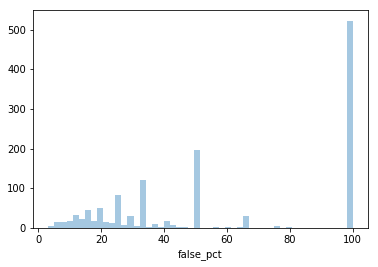

In [22]:
sns.distplot(df_false['false_pct'], kde=False, bins=50);

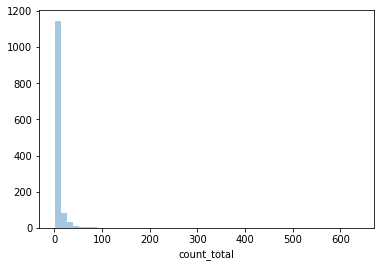

In [23]:
sns.distplot(df_false['count_total'], kde=False, bins=50);

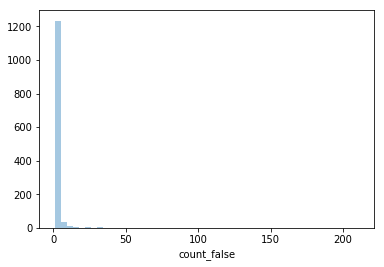

In [24]:
sns.distplot(df_false['count_false'], kde=False, bins=50);

In [25]:
df_false[df_false['false_pct'] == 100].sort_values(by=['count_total'], ascending=False).head(10)

,speaker,speaker_tag,count_total,count_false,false_pct
539,darrell-issa,PERSON,3,3,100.0
704,"students,-parents-and-teachers-supporting-marshall-tuck",O,2,2,100.0
718,beaverton,LOCATION,2,2,100.0
748,ryan-zinke,PERSON,2,2,100.0
747,wes-riddle,PERSON,2,2,100.0
735,jeanine-pirro,PERSON,2,2,100.0
729,julaine-appling,PERSON,2,2,100.0
619,stephen-martin,PERSON,2,2,100.0
725,sydney-batch,PERSON,2,2,100.0
717,mahmoud-ahmadinejad,PERSON,2,2,100.0


From this dataset information we can see that [Darrell Issa](https://en.wikipedia.org/wiki/Darrell_Issa) lied in 3 out of 3 statements he gave. This makes him an US polititian who proportionally gave the most number of false statements.

In [26]:
df_false[df_false['speaker']=='donald-trump']

,speaker,speaker_tag,count_total,count_false,false_pct
0,donald-trump,PERSON,639,211,33.020344


In [27]:
df_false[df_false['speaker']=='hillary-clinton']

,speaker,speaker_tag,count_total,count_false,false_pct
3,hillary-clinton,PERSON,300,31,10.333333


In [28]:
df_false[df_false['speaker']=='barack-obama']

,speaker,speaker_tag,count_total,count_false,false_pct
1,barack-obama,PERSON,619,71,11.470113


In [29]:
df_false.sort_values(by=['false_pct', 'count_total'], ascending=False)[1290:]

,speaker,speaker_tag,count_total,count_false,false_pct
112,david-axelrod,PERSON,18,1,5.555556
114,jon-huntsman,PERSON,18,1,5.555556
46,democratic-national-committee,ORGANIZATION,37,2,5.405405
28,tim-kaine,PERSON,56,3,5.357143
103,crossroads-gps,O,19,1,5.263158
97,david-perdue,PERSON,20,1,5.000000
96,republican-governors-association,O,20,1,5.000000
38,bill-clinton,PERSON,42,2,4.761905
84,mark-warner,PERSON,23,1,4.347826
70,wendy-davis,PERSON,27,1,3.703704


From the table above we can see that [Bill Nelson](https://en.wikipedia.org/wiki/Bill_Nelson) is a politician that proportionally lied the least. Out of 32 statement collected in this dataset, only 1 was false.

---

#### Custom-Made Label Metrics

In [30]:
df_lbls = df[['speaker', 'speaker_tag', 'label_as_nb']]
df_lbls = df_lbls.groupby(['speaker', 'speaker_tag']).sum().sort_values(by=['label_as_nb'], ascending=False)
df_lbls.head()

,,label_as_nb
speaker,speaker_tag,
donald-trump,PERSON,7726.0
bloggers,O,6254.0
barack-obama,PERSON,5664.0
hillary-clinton,PERSON,2772.0
chain-email,O,2600.0


If we use our system where we give some weights to different type of statements (least number of credits has truth and the most has a lie), we can see that it is most probable that the person with most number of statements become represented as a biggest lier. In this case our scale goes in the scale from 0 to 16. Let's calibrate the scale:

In [31]:
def label_to_nb_NEG_POS(l): 
    if l == 'full-flop': return 0
    elif l == 'half-flip': return 0
    elif l == 'no-flip': return 0
    elif l == 'true': return -3
    elif l == 'mostly-true': return -2
    elif l == 'half-true': return -1
    elif l == 'barely-true': return 1
    elif l == 'false': return 2
    elif l == 'pants-fire': return 3
    else: return 0

In [32]:
df['label_as_nb_repr_1'] = df['label'].apply(label_to_nb_NEG_POS)

In [33]:
df_lbls = df[['speaker', 'speaker_tag', 'label_as_nb_repr_1']]
df_lbls = df_lbls.groupby(['speaker', 'speaker_tag'])['label_as_nb_repr_1'].agg([('label_as_nb_truth', lambda x : x[x <= 0].sum()), 
                                                                                  ('label_as_nb_lie', lambda x : x[x > 0].sum()),
                                                                                  ('label_as_nb_repr_1', lambda x : x.sum())])
df_lbls = df_lbls.groupby(['speaker', 'speaker_tag']).sum().sort_values(by=['label_as_nb_repr_1'], ascending=False)
df_lbls.head(10)

,,label_as_nb_truth,label_as_nb_lie,label_as_nb_repr_1
speaker,speaker_tag,,,
bloggers,O,-50,1037,987
donald-trump,PERSON,-324,833,509
chain-email,O,-36,417,381
viral-image,O,-6,114,108
facebook-posts,ORGANIZATION,-55,161,106
chris-collins,PERSON,-120,216,96
michele-bachmann,PERSON,-29,100,71
ted-cruz,PERSON,-85,146,61
rush-limbaugh,PERSON,-9,64,55


In [34]:
def label_to_nb_LIES(l): 
    if l == 'full-flop': return 0
    elif l == 'half-flip': return 0
    elif l == 'no-flip': return 0
    elif l == 'true': return 0
    elif l == 'mostly-true': return 0
    elif l == 'half-true': return 0
    elif l == 'barely-true': return 1
    elif l == 'false': return 2
    elif l == 'pants-fire': return 3
    else: return 0

In [35]:
df['label_as_nb_repr_2'] = df['label'].apply(label_to_nb_LIES)

In [36]:
df_lbls = df[['speaker', 'speaker_tag', 'label_as_nb_repr_2']]
df_lbls = df_lbls.groupby(['speaker', 'speaker_tag']).sum().sort_values(by=['label_as_nb_repr_2'], ascending=False)
df_lbls.head(10)

,,label_as_nb_repr_2
speaker,speaker_tag,
bloggers,O,1037
donald-trump,PERSON,833
chain-email,O,417
barack-obama,PERSON,239
chris-collins,PERSON,216
facebook-posts,ORGANIZATION,161
mitt-romney,PERSON,155
scott-walker,PERSON,155
ted-cruz,PERSON,146


These three ways of representation above will be probably used to answer to this research question.

---

## 2. Evolution of lies during time?

In [37]:
df_years = df[['statement_year', 'label_as_nb']]
df_years = df_years.groupby(['statement_year']).sum().sort_values(by=['statement_year'], ascending=False)
df_years = df_years.drop(['n'])

In [38]:
df_years = df[['statement_year', 'label_as_nb_repr_1']]
df_years = df_years.groupby(['statement_year'])['label_as_nb_repr_1'].agg([('truth', lambda x : x[x <= 0].sum()), 
                                                                      ('lie', lambda x : x[x > 0].sum()),
                                                                      ('difference', lambda x : x.sum())])
df_years = df_years.drop(['n'])
df_years.head()

,truth,lie,difference
statement_year,,,
1995,0,0,0
2000,0,2,2
2002,0,1,1
2007,-367,131,-236
2008,-689,419,-270


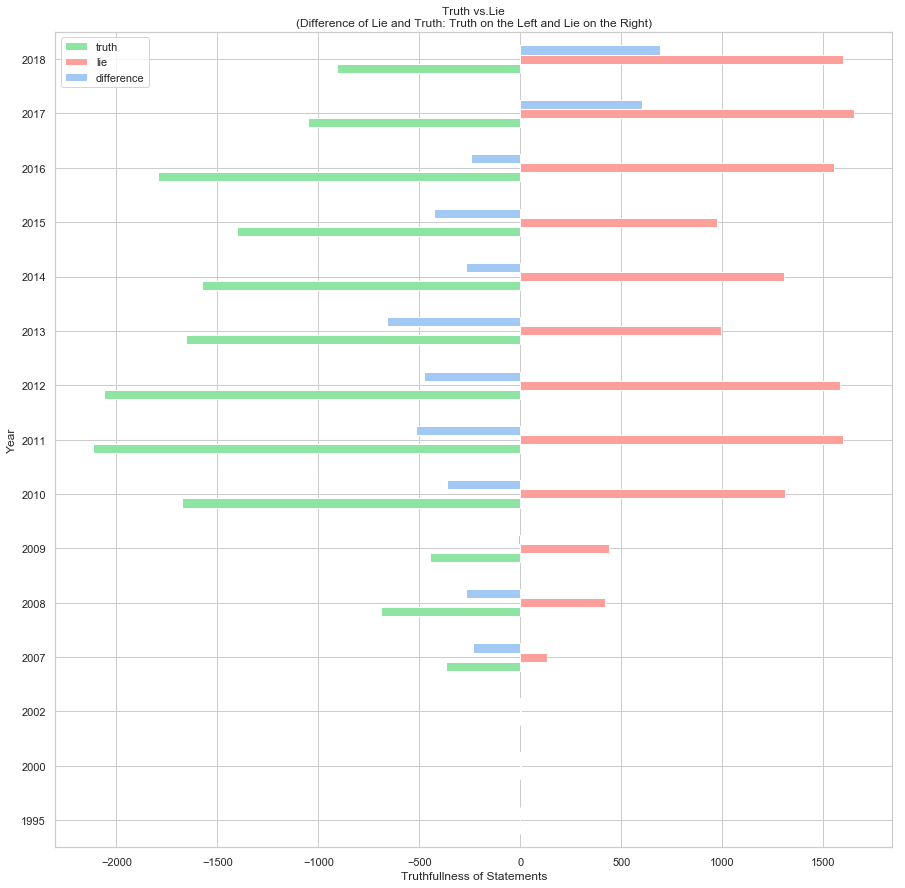

In [39]:
sns.set(style="whitegrid", palette="pastel")
df_years.sort_values(by='statement_year').plot(kind='barh', figsize=[15, 15], color=25*['g', 'r', 'b'])
plt.title('Truth vs.Lie\n(Difference of Lie and Truth: Truth on the Left and Lie on the Right)')
plt.ylabel('Year')
plt.xlabel('Truthfullness of Statements');
plt.show()

In this plot the truthfullness of the statement is considered. For example, pants-on-fire has more weight than just false statement.

In [40]:
df_years = df[['statement_year', 'label_as_nb_repr_2']]
df_years = df_years.groupby(['statement_year']).sum().sort_values(by=['statement_year'], ascending=False)
df_years = df_years.drop('n')
df_years.head()

,label_as_nb_repr_2
statement_year,
2018,1597
2017,1653
2016,1552
2015,973
2014,1306


In [41]:
df1 = group_and_count(df, 'statement_year')

In [42]:
df2 = group_and_count(df[(df['label'] == 'false')|(df['label'] == 'half-true')|(df['label'] == 'barely-true')], 'statement_year')

In [43]:
df_year_false = pd.merge(df1, df2, on='statement_year', suffixes=('_total', '_false')).sort_values("statement_year", ascending=False)
df_year_false.head(5)

,statement_year,count_total,count_false
7,2018,1336,796
6,2017,1390,731
2,2016,1835,1048
8,2015,1308,698
4,2014,1583,887


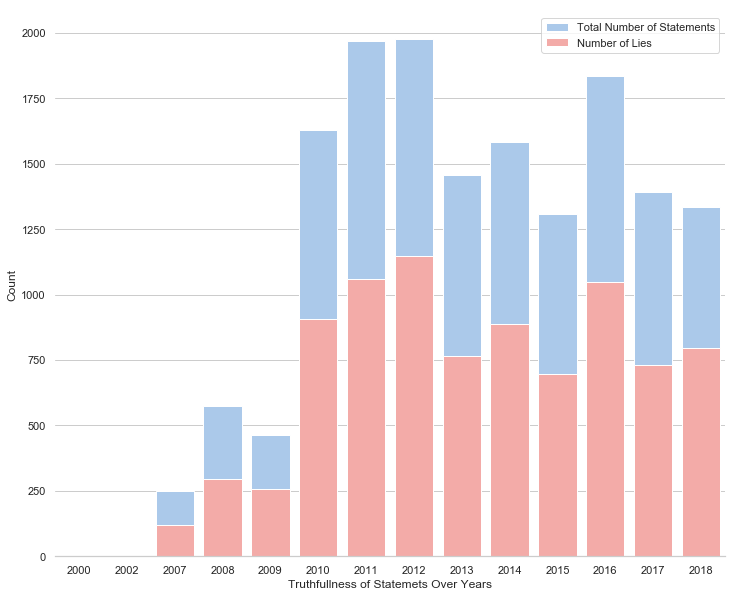

In [44]:
sns.set(style="whitegrid", palette="pastel")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Plot the total crashes
#sns.set_color_codes("pastel")
sns.barplot(x="statement_year", y="count_total", data=df_year_false,
            label="Total Number of Statements", color="b")

# Plot the crashes where alcohol was involved
#sns.set_color_codes("muted")
sns.barplot(x="statement_year", y="count_false", data=df_year_false,
            label="Number of Lies", color="r")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper right", frameon=True)
ax.set(ylabel="Count",
       xlabel="Truthfullness of Statemets Over Years")
sns.despine(left=True, top=True)

This plot only works with statement counts. It does not consider whether the statement was false or pants-on-fire type, both of these will simply be considered as a lie here.

In [45]:
df_lbl_year = df[['statement_year', 'label']].sort_values("statement_year", ascending=True)
df_lbl_year = df_lbl_year.drop(df_lbl_year[df_lbl_year['statement_year'] == 'n'].index)
df_lbl_year.head()

,statement_year,label
12601,1995,full-flop
13240,2000,false
13306,2002,barely-true
12614,2007,true
4170,2007,true


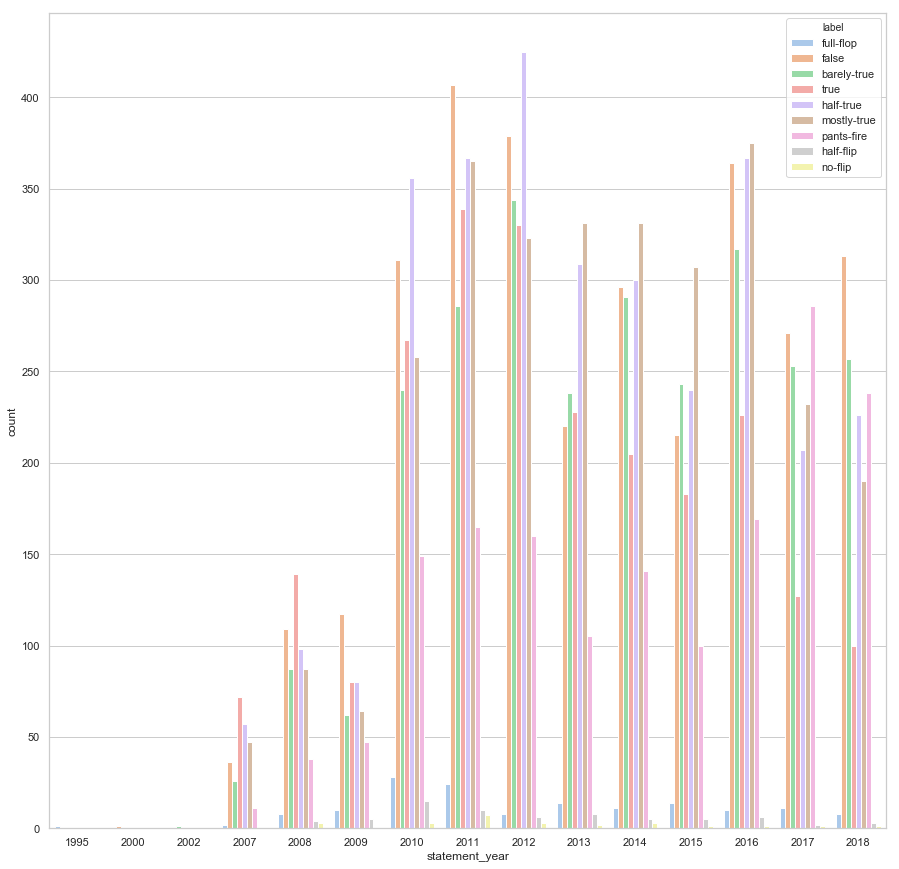

In [46]:
sns.set(style="whitegrid", palette="pastel")

f, ax = plt.subplots(figsize=(15, 15))
ax = sns.countplot(x="statement_year", hue="label", data=df_lbl_year, ax=ax)

plt.show()

In [47]:
# # Load the example tips dataset
# tips = sns.load_dataset("tips")

# # Draw a nested violinplot and split the violins for easier comparison
# sns.violinplot(x="day", y="total_bill", hue="smoker",
#                split=True, inner="quart",
#                palette={"Yes": "y", "No": "b"},
#                data=tips)
# sns.despine(left=True)

## 3. Who are the biggest liars (people/groups/context)

### Speakers Job Title

Compare who lies more: speakers_job_title_cleaned, context_tag_clean, speaker_home_state, statemet_type 

In [48]:
df_lbls = df[['speakers_job_title_cleaned', 'label_as_nb']]
df_lbls = df_lbls.groupby(['speakers_job_title_cleaned']).sum().sort_values(by=['label_as_nb'], ascending=False)
df_lbls.head()

,label_as_nb
speakers_job_title_cleaned,
,55694.0
senator,19366.0
president,19076.0
houseman,17160.0
governor,11402.0


In [49]:
df_lbls = df[['speakers_job_title_cleaned', 'label_as_nb_repr_1']]
df_lbls = df_lbls.groupby(['speakers_job_title_cleaned'])['label_as_nb_repr_1'].agg([('label_as_nb_truth', lambda x : x[x <= 0].sum()), 
                                                                                  ('label_as_nb_lie', lambda x : x[x > 0].sum()),
                                                                                  ('label_as_nb_repr_1', lambda x : x.sum())])
df_lbls = df_lbls.groupby(['speakers_job_title_cleaned']).sum().sort_values(by=['label_as_nb_repr_1'], ascending=False)
df_lbls.head(10)

,label_as_nb_truth,label_as_nb_lie,label_as_nb_repr_1
speakers_job_title_cleaned,,,
,-4010,5377,1367
social media posting,-55,161,106
radio host,-9,70,61
website,-2,50,48
radio talk show host,-6,26,20
columnist and author,-8,26,18
talk-show host,0,15,15
political commentator and radio talk show host,-1,15,14
state delegate,-11,22,11


In [50]:
df_lbls = df[['speakers_job_title_cleaned', 'label_as_nb_repr_2']]
df_lbls = df_lbls.groupby(['speakers_job_title_cleaned']).sum().sort_values(by=['label_as_nb_repr_2'], ascending=False)
df_lbls.head(10)

,label_as_nb_repr_2
speakers_job_title_cleaned,
,5377
president,1385
houseman,1267
senator,1195
governor,775
congressman,616
social media posting,161
milwaukee county executive,155
u.s. energy secretary,146


### Context Tag Clean

In [51]:
df_lbls = df[['context_tag_clean', 'label_as_nb']]
df_lbls = df_lbls.groupby(['context_tag_clean']).sum().sort_values(by=['label_as_nb'], ascending=False)
df_lbls.head()

,label_as_nb
context_tag_clean,
interview,18236.0
news,13698.0
campaign,12746.0
speech,11080.0
ad,10586.0


In [52]:
df_lbls = df[['context_tag_clean', 'label_as_nb_repr_1']]
df_lbls = df_lbls.groupby(['context_tag_clean'])['label_as_nb_repr_1'].agg([('label_as_nb_truth', lambda x : x[x <= 0].sum()), 
                                                                                  ('label_as_nb_lie', lambda x : x[x > 0].sum()),
                                                                                  ('label_as_nb_repr_1', lambda x : x.sum())])
df_lbls = df_lbls.groupby(['context_tag_clean']).sum().sort_values(by=['label_as_nb_repr_1'], ascending=False)
df_lbls.head(10)

,label_as_nb_truth,label_as_nb_lie,label_as_nb_repr_1
context_tag_clean,,,
post,-408,919,511
headline,-18,460,442
internet,-16,241,225
email,-132,276,144
mail,-107,238,131
web,-101,188,87
blog,-31,106,75
media,-46,103,57
facebook,-30,86,56


In [53]:
df_lbls = df[['context_tag_clean', 'label_as_nb_repr_2']]
df_lbls = df_lbls.groupby(['context_tag_clean']).sum().sort_values(by=['label_as_nb_repr_2'], ascending=False)
df_lbls.head(10)

,label_as_nb_repr_2
context_tag_clean,
interview,1372
news,1143
campaign,992
post,919
ad,773
debate,728
speech,714
press,690
tweet,482


### Statemet Type

In [54]:
df_lbls = df[['statement_type', 'label_as_nb']]
df_lbls = df_lbls.groupby(['statement_type']).sum().sort_values(by=['label_as_nb'], ascending=False)
df_lbls.head()

,label_as_nb
statement_type,
Claim,148428.0
Attack,18970.0
Flip,246.0


In [55]:
df_lbls = df[['statement_type', 'label_as_nb_repr_1']]
df_lbls = df_lbls.groupby(['statement_type'])['label_as_nb_repr_1'].agg([('label_as_nb_truth', lambda x : x[x <= 0].sum()), 
                                                                                  ('label_as_nb_lie', lambda x : x[x > 0].sum()),
                                                                                  ('label_as_nb_repr_1', lambda x : x.sum())])
df_lbls = df_lbls.groupby(['statement_type']).sum().sort_values(by=['label_as_nb_repr_1'], ascending=False)
df_lbls.head(10)

,label_as_nb_truth,label_as_nb_lie,label_as_nb_repr_1
statement_type,,,
Attack,-1369,1621,252
Flip,-6,0,-6
Claim,-14365,11929,-2436


In [56]:
df_lbls = df[['statement_type', 'label_as_nb_repr_2']]
df_lbls = df_lbls.groupby(['statement_type']).sum().sort_values(by=['label_as_nb_repr_2'], ascending=False)
df_lbls.head(10)

,label_as_nb_repr_2
statement_type,
Claim,11929
Attack,1621
Flip,0


## 4. Do politicians coming from different states lie more?

### Speaker Home State

In [57]:
df_lbls = df[['speaker_home_state', 'label_as_nb']]
df_lbls = df_lbls.groupby(['speaker_home_state']).sum().sort_values(by=['label_as_nb'], ascending=False)
df_lbls.head()

,label_as_nb
speaker_home_state,
,45110.0
New York,16150.0
Texas,14742.0
Florida,13844.0
Wisconsin,10892.0


In [58]:
df_lbls = df[['speaker_home_state', 'label_as_nb_repr_1']]
df_lbls = df_lbls.groupby(['speaker_home_state'])['label_as_nb_repr_1'].agg([('label_as_nb_truth', lambda x : x[x <= 0].sum()), 
                                                                                  ('label_as_nb_lie', lambda x : x[x > 0].sum()),
                                                                                  ('label_as_nb_repr_1', lambda x : x.sum())])
df_lbls = df_lbls.groupby(['speaker_home_state']).sum().sort_values(by=['label_as_nb_repr_1'], ascending=False)
df_lbls.head(10)

,label_as_nb_truth,label_as_nb_lie,label_as_nb_repr_1
speaker_home_state,,,
,-2861,4773,1912
New York,-1304,1449,145
Minnesota,-56,119,63
Pennsylvania,-114,134,20
Alabama,-24,43,19
Alaska,-73,84,11
NC,-3,12,9
Iowa,-19,27,8
Montana,-5,13,8


In [59]:
df_lbls = df[['speaker_home_state', 'label_as_nb_repr_2']]
df_lbls = df_lbls.groupby(['speaker_home_state']).sum().sort_values(by=['label_as_nb_repr_2'], ascending=False)
df_lbls.head(10)

,label_as_nb_repr_2
speaker_home_state,
,4773
New York,1449
Texas,1091
Florida,880
Wisconsin,866
Virginia,392
Ohio,373
Illinois,363
Rhode Island,360


## 5. When do they lie? Do they lie before elections?

## 6. Do they lie more when doing federal vs state politics?

## 8. Is there a correlation between politicians being voted out of office and their lies?